<a href="https://colab.research.google.com/github/pastoril10/PredicaoDeDroga/blob/main/Predi%C3%A7%C3%A3o_de_Droga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features:


*   Age (idade)
*   Sex (sexo)
*   BP (Pressão Arterial)
*   Cholesterol (Nível de Colesterol)
*   Na_to_K (Nível da dosagem)
*   Drug (Target)













In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("drug200.csv")

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

Há dados faltantes? Não!!

In [ ]:
df[df.isnull().any(axis=1)].sum()

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

Drug - Droga


*   drugA - 0
*   drugB - 1
*   drugC - 2
*   drugX - 3
*   drugY - 4








In [ ]:
df.rename(columns = {"Age":"idade", "Sex":"sexo","BP":"bp","Cholesterol":"colesterol","Drug":"droga"},inplace=True)

In [ ]:
df.droga.dtype

dtype('O')

In [ ]:
df.droga.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df["droga"].replace(to_replace = ["drugA", "drugB", "drugC","drugX","drugY"], value=[0,1,2,3,4], inplace=True)

In [ ]:
df.droga.value_counts()

4    91
3    54
0    23
2    16
1    16
Name: droga, dtype: int64

## Idade

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f394c179c10>]],
      dtype=object)

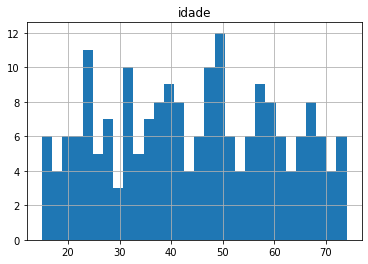

In [ ]:
df.hist("idade", bins = 30)

# Sexo

*   Masculino - 1
*   Feminino - 0



In [ ]:
df.sexo.unique()

array(['F', 'M'], dtype=object)

In [ ]:
df.sexo.replace(to_replace=["F","M"], value=[0,1], inplace=True)

In [ ]:
df.sexo.value_counts()

1    104
0     96
Name: sexo, dtype: int64

In [ ]:
#Relacionar o tipo de droga com o sexo do paciente
pd.crosstab(df.droga, df.sexo)

sexo,0,1
droga,,
0,9,14
1,6,10
2,7,9
3,27,27
4,47,44


# BP - Pressão arterial 

*   LOW (Baixo) - 0
*   NORMAL (Normal) - 1
*   HIGH (Alta) - 2





In [ ]:
df.bp.dtype

dtype('O')

In [ ]:
df.bp.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df.bp.replace(to_replace=["LOW", "NORMAL","HIGH"], value = [0,1,2], inplace=True)

In [ ]:
df.bp.value_counts()

2    77
0    64
1    59
Name: bp, dtype: int64

In [ ]:
#Relacionando o tipo de pressão (baixa, media e alta) com o tipo de droga
pd.crosstab(df.droga, df.bp)

bp,0,1,2
droga,,,
0,0,0,23
1,0,0,16
2,16,0,0
3,18,36,0
4,30,23,38


# Colesterol
*   NORMAL - 0
*   HIGH (Alta) - 1



In [ ]:
df.colesterol.dtype

dtype('O')

In [ ]:
df.colesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df.colesterol.replace(to_replace=["NORMAL", "HIGH"], value=[0,1], inplace=True)

In [ ]:
df.colesterol.value_counts()

1    103
0     97
Name: colesterol, dtype: int64

In [ ]:
pd.crosstab(df.droga, df.colesterol)

colesterol,0,1
droga,,
0,11,12
1,8,8
2,0,16
3,34,20
4,44,47


In [ ]:
df.head()

,idade,sexo,bp,colesterol,Na_to_K,droga
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


# Na_to_K

  Nível de relação entre Sódio e Potassío (Dentro e fora da célula). Medido em mEq/l (miliequivalencia por litro)

In [ ]:
df["Na_to_K"].dtype

dtype('float64')

In [ ]:
df.rename(columns={"Na_to_K":"dosagem"}, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f394608afd0>]],
      dtype=object)

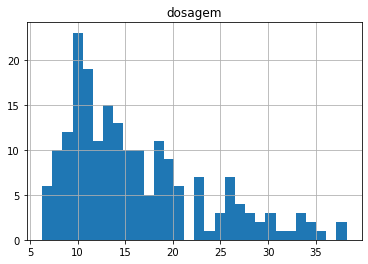

In [ ]:
df.hist("dosagem", bins=30)

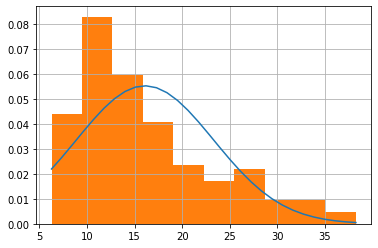

In [ ]:
#Fit da distribuição de idade
x_list = np.linspace(df["dosagem"].min() , df["dosagem"].max(), num=30)
y_list = norm.pdf(x_list,  loc = df["dosagem"].mean(), scale=df["dosagem"].std())


plt.plot(x_list, y_list)
df["dosagem"].hist(density = True)

## Correlação entre as variaveis (Features)

In [ ]:
cor_matrix = df.corr()

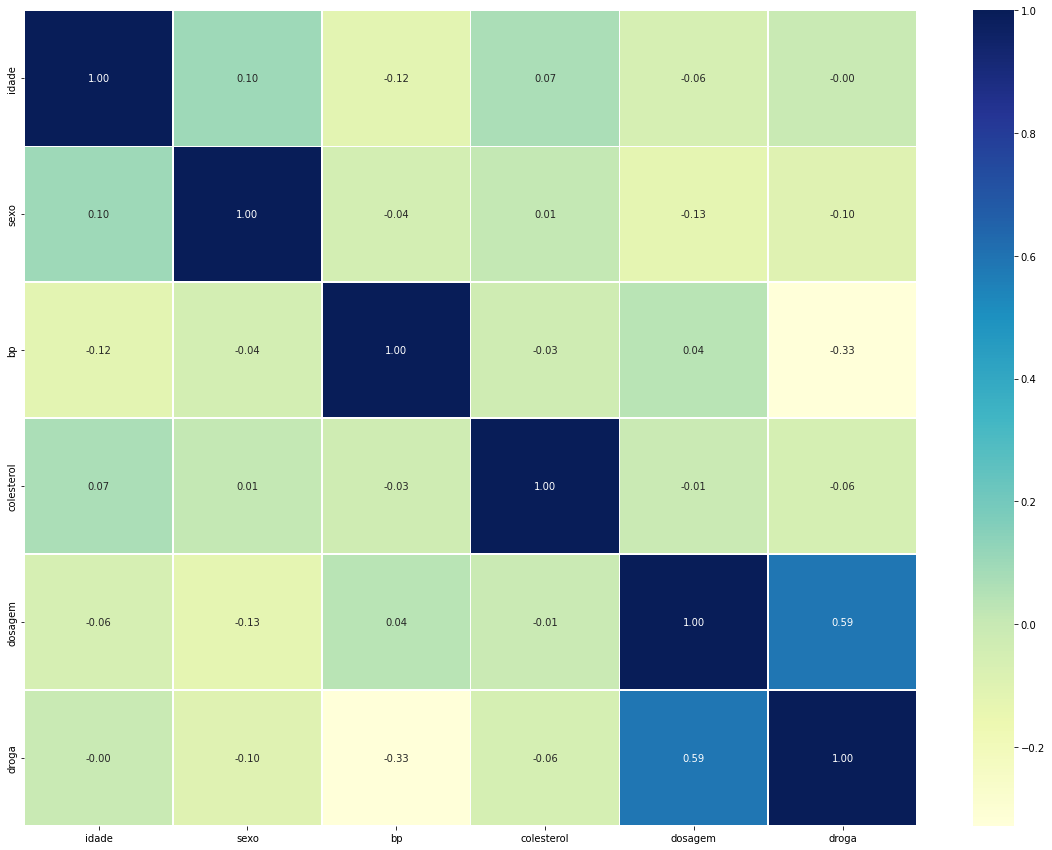

In [ ]:
cor_matrix = df.corr()
plt.figure(figsize =  (20,15))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

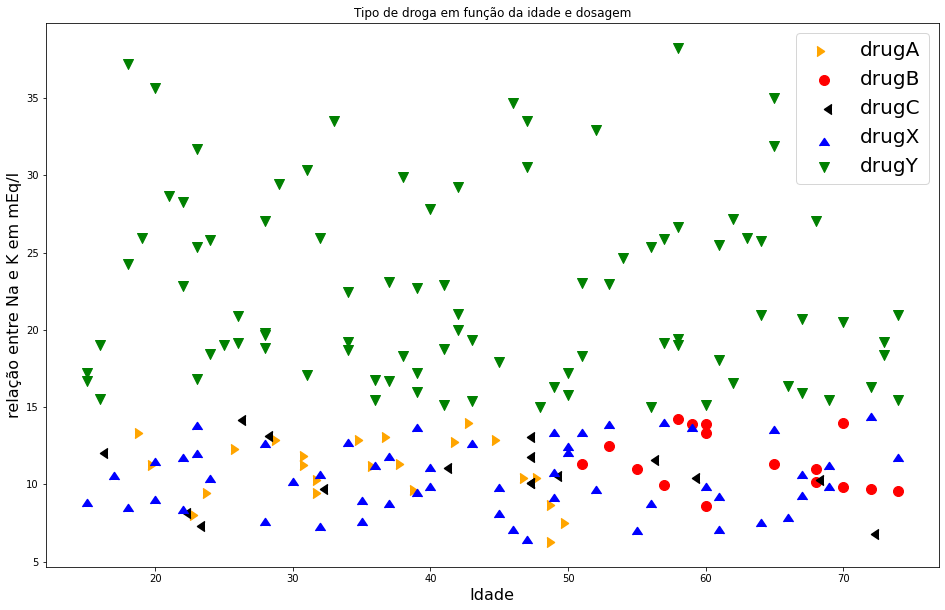

In [ ]:
#Grafico de dispersão entre a frequência cardiaca e a idade de quem tem doença e de quem não tem doença cardiaca
plt.figure(figsize=(16,10))

plt.scatter(df.idade[df.droga == 0], df.dosagem[df.droga == 0], c = "orange",marker=5, s=100)
plt.scatter(df.idade[df.droga == 1], df.dosagem[df.droga == 1], c = "red", marker="o", s=100)
plt.scatter(df.idade[df.droga == 2], df.dosagem[df.droga == 2], c = "black", marker=4, s=100)
plt.scatter(df.idade[df.droga == 3], df.dosagem[df.droga == 3], c = "blue", marker = 6, s=100)
plt.scatter(df.idade[df.droga == 4], df.dosagem[df.droga == 4], c = "green", marker="v", s=100)

plt.title("Tipo de droga em função da idade e dosagem")
plt.xlabel("Idade",fontsize = 16,)
plt.ylabel("relação entre Na e K em mEq/l",fontsize = 16)
plt.legend(["drugA", "drugB", "drugC","drugX","drugY"], loc="best", prop={"size":20})

*   A droga Y é aplicada em todas as idades em dosagem acima de 15.
*   A droga B é aplicada em pacientes acima dos 50 anos e em dosagem abaixo de 15.

*   As demais drogas são aplicadas em todas as faixa etárias em em quantidades abaixo de 15












In [ ]:
df_novo = df.copy()

In [ ]:
X = df_novo.drop("droga", axis = 1)
y = df_novo.droga.values

In [ ]:
X

,idade,sexo,bp,colesterol,dosagem
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


In [ ]:
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

In [ ]:
models = {
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

In [ ]:
models

{'DecisionTree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train= y_train, y_test= y_test)

model_scores

{'DecisionTree': 0.975,
 'KNN': 0.55,
 'LogisticRegression': 0.85,
 'RandomForest': 0.95}

In [ ]:
com_model = pd.DataFrame(model_scores, index=["accuracy"])
com_model

,KNN,LogisticRegression,RandomForest,DecisionTree
accuracy,0.55,0.85,0.95,0.975


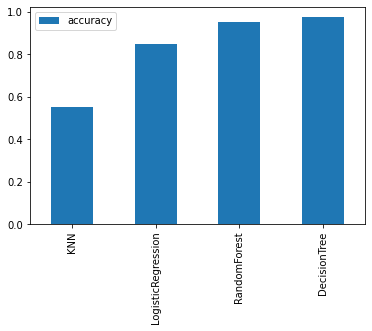

In [ ]:
model_comparacao = pd.DataFrame(model_scores, index=['accuracy'])
model_comparacao.T.plot.bar();

In [ ]:
#Usando o RandomForestClassifier (Parametros)
lr_model_RandomForest = RandomForestClassifier()

In [ ]:
lr_model_RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Usando o DecisionTree (Parametros)
lr_model_DecisionTree = DecisionTreeClassifier()

In [ ]:
lr_model_DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')